In [1]:
# Needed for functions
import time
import numpy as np
from numpy import pi
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#import packages for classical algorithm
import ctypes
from numpy import ctypeslib as npct

#import packages for quantum algorithm
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.quantum_info as qi

In [2]:
#initialize variables for classical solver
array_1d_double = npct.ndpointer(dtype=np.double, ndim=1, flags='CONTIGUOUS')
array_1d_int = npct.ndpointer(dtype=np.int_, ndim=1, flags='CONTIGUOUS')

c_lib_numpy = npct.load_library("lib/SATProbCalc.so", ".")

x = 250#75
i = 1844674407370955161#int(np.ceil((x**2))) 
c = 1065 #375

c_lib_numpy.SolveSATbpp.restype = ctypes.c_int #ctypes.POINTER(ctypes.c_double * (10**2))
c_lib_numpy.SolveSATbpp.argtypes = [ctypes.c_int, array_1d_double, ctypes.c_int, ctypes.c_int]

In [3]:
def SolveSATbpp(n, sat, clauses, iterations):
    steps = c_lib_numpy.SolveSATbpp(n, sat.flatten(), clauses, iterations)
    return steps

In [4]:
def buildSatSingleSolution(numVar):
    sat = [[1,2,3],[-1,2,3],[1,-2,3],[1,2,-3],[-1,-2,3],[-1,2,-3],[1,-2,-3]]
    for n in range(4,numVar+1):
        sat.append([2,3,n])
        sat.append([2,3,-n])
        sat.append([-2,-3,n])
    return sat

In [5]:
def classicalStatistics(n, SAT, c, i, numRuns):
    
    stepList = [1]
    for x in range(numRuns):
        stepList.append(SolveSATbpp(n, SAT, c, i))
    
    counter = Counter(stepList)
    res = {item: count for item, count in counter.items()}
#     print(res)
    
    return res
    

In [8]:
def classicalSolve():
    n = 6
    c = 3*n - 2
    i = 1000
    
    SAT = buildSatSingleSolution(n)

    SAT = np.array(SAT).astype('double')
#     for x in range(len(SAT)):
#         SAT[x] = -SAT[x]
    # print(SAT)

    start = time.time()
    res = classicalStatistics(n, SAT, c, i, 100000000)
    print("C++ time to solve: " , start - time.time())

    return res

C++ time to solve:  -842.8720140457153
{0: 2750638, 1: 5690982, 2: 4943862, 3: 6623938, 4: 5214533, 5: 5276304, 6: 3833617, 7: 4773959, 8: 5606611, 9: 3465276, 10: 4185645, 11: 3012221, 12: 3261055, 13: 4083335, 14: 2248864, 15: 3019133, 16: 3447269, 17: 2255135, 18: 1447243, 19: 2078792, 20: 2048642, 21: 2240058, 22: 2218579, 23: 1567670, 24: 1015394, 25: 1098673, 26: 688823, 27: 667075, 28: 868751, 29: 467518, 30: 189088, 31: 841305, 32: 369779, 33: 539632, 34: 603858, 35: 787156, 36: 173562, 37: 428107, 38: 424591, 39: 582382, 40: 169224, 41: 327845, 42: 400512, 43: 485106, 44: 237408, 46: 311754, 47: 385669, 48: 149611, 49: 372183, 50: 153439, 51: 76684, 52: 296172, 53: 192983, 54: 217045, 55: 70063, 56: 70387, 57: 138767, 61: 70759, 62: 63268, 63: 136059, 65: 129484, 66: 64451, 71: 63151, 73: 57314, 74: 59655, 83: 56100, 92: 103246, 94: 102607}


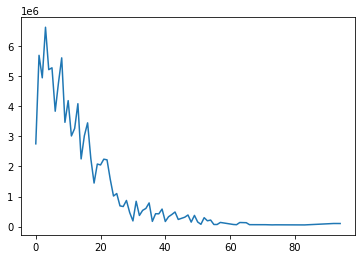

In [9]:
res = classicalSolve()

myKeys = list(res.keys())
myKeys.sort()
sorted_dict = {i: res[i] for i in myKeys}

 
print(sorted_dict)

plt.plot(list(map(int,sorted_dict.keys())),sorted_dict.values())
